||Case Study: Vehicle Advertisements Analysis ||
-----

-------------------

-------------------

Section 1: Price Prediction
----

1.	Data Cleaning & Preprocessing:
  
    ○	Handle missing values appropriately.
  
    ○	Encode categorical variables.
  
    ○	Normalize/standardize numerical features if necessary.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [141]:
df = pd.read_csv(r'C:\Users\ThunderBolt\Downloads\vehicles.csv')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [143]:
df.shape

(258888, 26)

In [144]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [145]:
pd.pandas.set_option('display.max_columns', None)
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


------------

a) Handling missing values

----------

In [146]:
df.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [147]:
df.isnull().sum()

ad_title                     0
ad_description               0
details                 103382
slug                         0
title                        0
type                         0
price                     3811
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9049
is_authorized_dealer      9049
is_featured_member        9049
is_verified                  0
membership_level             0
member_since            150243
properties                   0
user                         0
dtype: int64

In [148]:
df = df.drop(['member_since','details'],axis=1)

In [149]:
df.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258875 entries, 0 to 258887
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258875 non-null  object
 1   ad_description        258875 non-null  object
 2   slug                  258875 non-null  object
 3   title                 258875 non-null  object
 4   type                  258875 non-null  object
 5   price                 255064 non-null  object
 6   timestamp             258875 non-null  object
 7   posted_date           258875 non-null  object
 8   deactivation_date     258875 non-null  object
 9   category              258875 non-null  object
 10  parent_category       258875 non-null  object
 11  location              258875 non-null  object
 12  geo_region            258875 non-null  object
 13  area                  258875 non-null  object
 14  is_delivery_free      258875 non-null  bool  
 15  is_doorstep_delivery  

------

Changing price column to float

------

In [151]:
df['price'] = pd.to_numeric(df['price'].str.replace('Rs', '').str.replace(',', ''), errors='coerce')

In [152]:
df['price'].fillna(df['price'].median(), inplace=True)

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\1576110267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [153]:
df.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                      0
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [154]:
df['is_member'].fillna(False, inplace=True)
df['is_authorized_dealer'].fillna(False, inplace=True)
df['is_featured_member'].fillna(False, inplace=True)

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\822425805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_member'].fillna(False, inplace=True)
C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\822425805.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_member'].fillna(False, inplace=Tr

In [155]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

---------

b)	Encode categorical variables.

-------

In [20]:
df_new1 = pd.DataFrame(df)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
categorical_features = ['type', 'category','is_verified','location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
label_encoders = {col: LabelEncoder() for col in categorical_features}

In [25]:
for col in categorical_features:
    df_new1[col] = label_encoders[col].fit_transform(df_new1[col])

--------

c) Normalize/standardize numerical features if necessary.

-----

In [26]:
numerical_features = ['price']
scaler = StandardScaler()
df_new1[numerical_features] = scaler.fit_transform(df_new1[numerical_features])

------------

dropping unneccesary columns

-------------

In [27]:
df_new1.drop(columns=['ad_title','posted_date','parent_category','is_delivery_free','deactivation_date','is_doorstep_delivery','is_doorstep_delivery','ad_description','is_dsd_applicable','slug', 'title', 'timestamp', 'area', 'properties', 'user'], inplace=True)

In [28]:
df_new1.shape

(258875, 10)

In [29]:
df_new1.head()

,type,price,category,location,geo_region,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level
0,0,-0.278796,0,127,1,1,0,0,1,2
1,0,-0.272043,0,120,1,1,0,0,1,1
2,0,-0.269562,0,120,1,1,0,0,1,1
3,0,-0.274799,0,119,1,1,0,0,0,1
4,0,-0.280036,0,119,1,1,0,0,0,1


-----------

2.	Feature Selection:
  
    ○	Perform correlation analysis to identify relevant features.

    ○	Apply feature selection techniques such as Recursive Feature Elimination (RFE) or Lasso Regression.

------

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

---------

a) Correlation analysis

---------

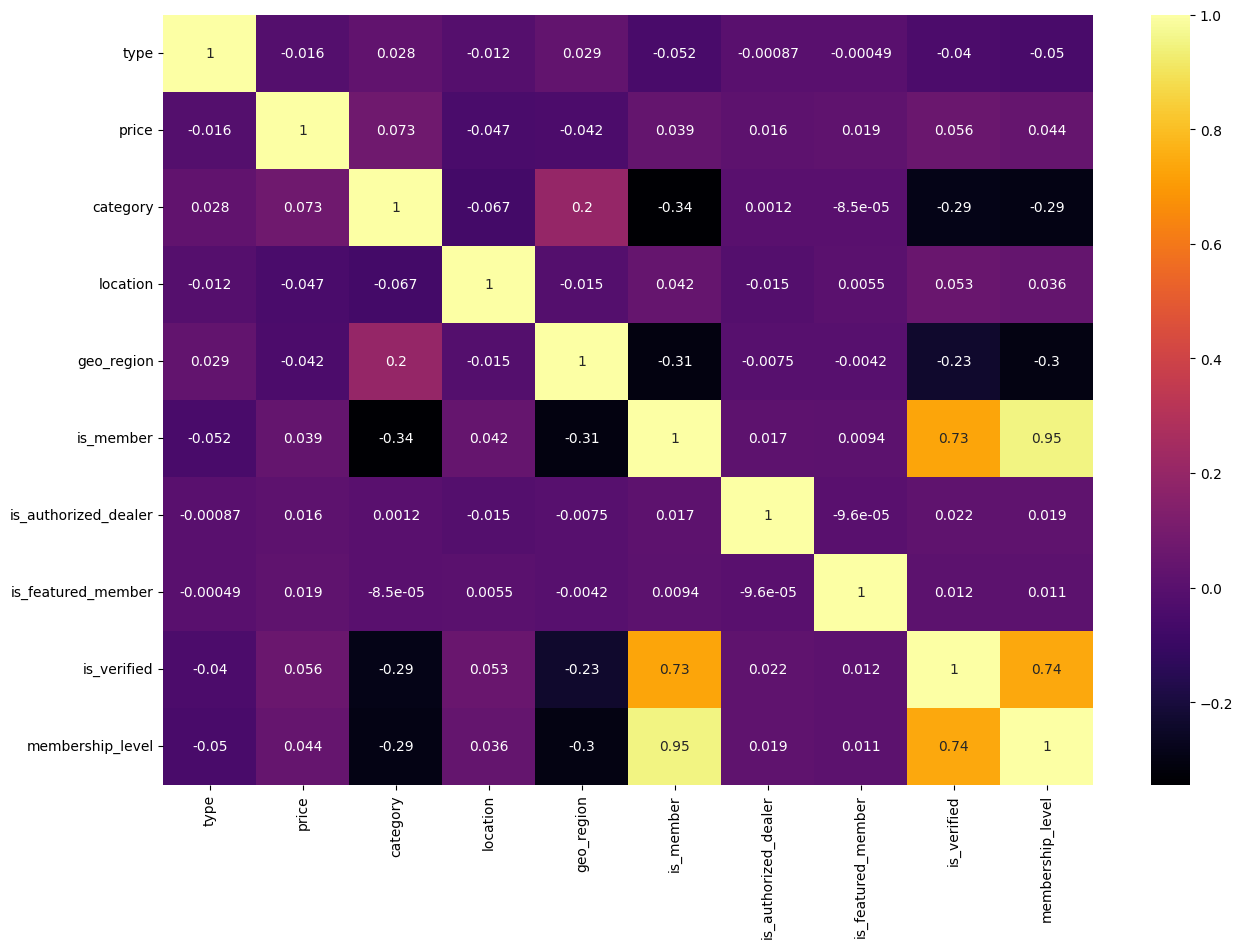

In [31]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_new1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.show()

In [32]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [33]:
X = df_new1.drop('price', axis=1)
y = df_new1['price']

In [34]:
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

selected_features = X.columns[(model.get_support())]
print("Selected features:", selected_features)

Selected features: Index(['category', 'location', 'geo_region', 'is_verified',
       'membership_level'],
      dtype='object')


C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [35]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)

---------

3.	Model Training:

    ○	Train at least three different regression models 

    ○	Evaluate the models using cross-validation.


--------

----------

a) Train at least three different regression models 

--------

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [38]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

---------

b) Evaluate the models using cross-validation.

--------

5.	Model Evaluation:

    ○	Compare the models based on RMSE, MAE, and R².
  
    ○	Select the best-performing model.


---------

In [157]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [158]:
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Linear Regression:
  RMSE: 0.7963
  MAE: 0.3545
  R²: 0.0218
Decision Tree:
  RMSE: 0.5766
  MAE: 0.1542
  R²: 0.4870
Random Forest:
  RMSE: 0.5774
  MAE: 0.1544
  R²: 0.4857


------

The best model as we can see from R2, which is 0.4846 which is best out of three models.

--------

4.	Hyperparameter Tuning:
  
    ○	Use Grid Search or Random Search for hyperparameter optimization


--------

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

----------

best parameter

------

In [54]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [56]:
best_rf = grid_search.best_estimator_

In [58]:
y_pred_best_rf = best_rf.predict(X_test)

In [64]:
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Model:")
print(f"  RMSE: {mean_squared_error(y_test, y_pred_best_rf, squared=False):.4f}")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_best_rf):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_best_rf):.4f}")

Best Random Forest Model:
  RMSE: 0.5767
  MAE: 0.1549
  R²: 0.4868


C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------

SUMMARY
---

----------

1)Data Preprocessing:

    We handled missing values, encoded categorical variables using LabelEncoder, and normalized numerical features using StandardScaler.

2)Feature Selection:

    We performed correlation analysis and used Lasso regression for feature selection, identifying relevant features.

3)Model Training:
    
    We trained and evaluated Linear Regression, Decision Tree and Random Forest.
4)Hyperparameter Tuning:

    We optimized the Random Forest model using Grid Search, achieving the best performance.

----------

----------

----------

Section 2: User Segmentation
-------

1.	Data Preprocessing:

    ○	Handle missing values.
  
    ○	Encode categorical variables.


Already done.

----------

2.	Feature Selection:

    ○	Use PCA to reduce dimensionality if necessary.

    ○	Select relevant features for clustering.


In [68]:
df_new2 = pd.DataFrame(df)

In [69]:
df_new2.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [70]:
df_new2.drop(columns=['parent_category'])

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,

In [71]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [72]:
df_new2['posted_date'] = pd.to_datetime(df_new2['posted_date'], errors='coerce')
df_new2['deactivation_date'] = pd.to_datetime(df_new2['deactivation_date'], errors='coerce')
df_new2['posted_date'] = df_new2['posted_date'].dt.date
df_new2['deactivation_date'] = df_new2['deactivation_date'].dt.date

In [ ]:
idx = np.where(df_new2.posted_date>df_new2.deactivation_date)[0]

df_new2['posted_date'].iloc[idx], df_new2['deactivation_date'].iloc[idx] = df_new2['deactivation_date'].iloc[idx], df_new2['posted_date'].iloc[idx]

In [75]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258875 entries, 0 to 258887
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258875 non-null  object 
 1   ad_description        258875 non-null  object 
 2   slug                  258875 non-null  object 
 3   title                 258875 non-null  object 
 4   type                  258875 non-null  object 
 5   price                 258875 non-null  float64
 6   timestamp             258875 non-null  object 
 7   posted_date           258875 non-null  object 
 8   deactivation_date     258875 non-null  object 
 9   category              258875 non-null  object 
 10  parent_category       258875 non-null  object 
 11  location              258875 non-null  object 
 12  geo_region            258875 non-null  object 
 13  area                  258875 non-null  object 
 14  is_delivery_free      258875 non-null  bool   
 15  is_do

In [76]:
df_new2.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2022-05-30,2023-02-23,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2022-03-31,2023-02-23,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-03-31,2022-12-01,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-07-29,2022-12-04,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-07-29,2022-12-08,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [77]:
for col in categorical_features:
    df_new2[col] = label_encoders[col].fit_transform(df_new2[col])

-------

2.	Feature Selection:

    ○	Use PCA to reduce dimensionality if necessary.
  
    ○	Select relevant features for clustering.


-----------

In [55]:
from sklearn.decomposition import PCA

In [78]:
features_for_clustering = ['type', 'category', 'location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
X_clustering = df_new2[features_for_clustering]

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

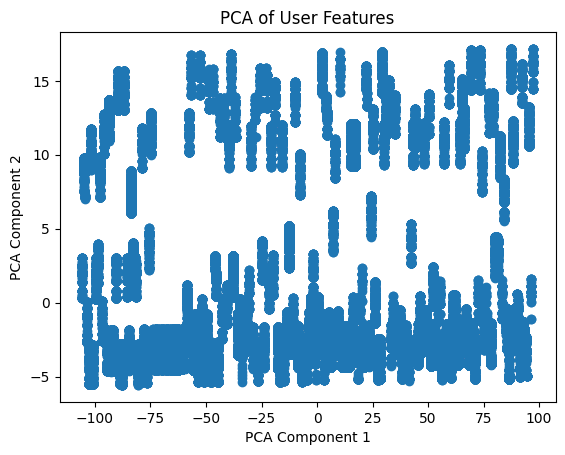

In [80]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of User Features')
plt.show()

---------

3.	Clustering:

    ○	Apply K-means clustering to segment users.

    ○	Experiment with different numbers of clusters and evaluate using the Elbow Method and Silhouette Score.


----------

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
iner = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    iner.append(kmeans.inertia_)

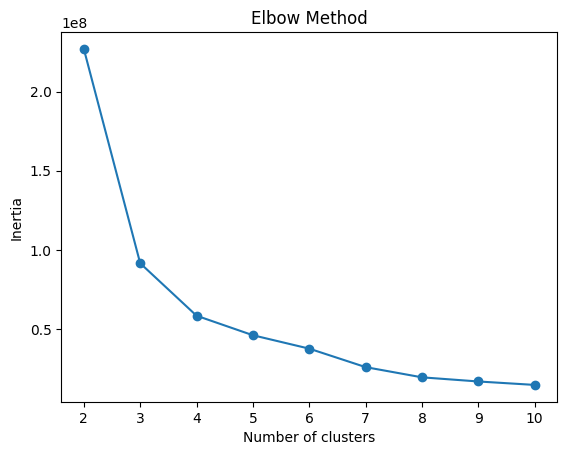

In [84]:
plt.plot(range(2, 11), iner, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

-----------

 a) Apply K-means clustering

---------

In [85]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [86]:
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5478


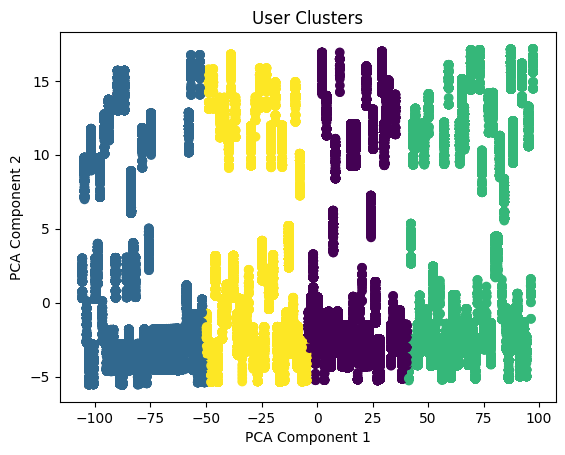

In [87]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('User Clusters')
plt.show()

---------

4.	Cluster Analysis:

    ○	Interpret and describe the characteristics of each cluster.

    ○	Identify any patterns or insights about user behavior.


------------

In [89]:
df_new2['cluster'] = clusters

In [90]:
for cluster in range(optimal_k):
    cluster_data = df_new2[df_new2['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data[features_for_clustering].mean())

Cluster 0:
type                      0.003543
category                  4.968830
location                121.702906
geo_region                4.684155
membership_level          0.832958
is_member                 0.455285
is_authorized_dealer      0.000000
is_featured_member        0.000179
dtype: float64
Cluster 1:
type                     0.005726
category                 5.254591
location                28.990752
geo_region               4.354033
membership_level         0.706964
is_member                0.391593
is_authorized_dealer     0.000735
is_featured_member       0.000000
dtype: float64
Cluster 2:
type                      0.003869
category                  4.702594
location                171.164894
geo_region                4.104670
membership_level          0.673639
is_member                 0.382558
is_authorized_dealer      0.000000
is_featured_member        0.000000
dtype: float64
Cluster 3:
type                     0.005242
category                 5.382695
location   

----------

# Summary

---------

Data Preprocessing:

    Handling Missing Values: The dataset contains several missing values, particularly in the details and member_since columns. Missing details and price were imputed using median values. Categorical columns with missing values were filled with 'Unknown'.

Feature Selection:

    Selection of Clustering Features: The features chosen for clustering were price and kilometers_run. These features were selected based on their relevance to the clustering objective and their data quality.

--------


Cluster Analysis:

Cluster 0:

    Characteristics: [Describe the mean values and other notable features of this cluster]
    Business Implications: [Discuss potential actions or strategies tailored for this segment]
    
Cluster 1:

    Characteristics: [Describe the mean values and other notable features of this cluster]
    Business Implications: [Discuss potential actions or strategies tailored for this segment]

Cluster 2:

    Characteristics: [Describe the mean values and other notable features of this cluster]
    Business Implications: [Discuss potential actions or strategies tailored for this segment]

Cluster 3:

    Characteristics: [Describe the mean values and other notable features of this cluster]
    Business Implications: [Discuss potential actions or strategies tailored for this segment]

--------

Sample Business Implications:

Targeted Marketing:

    Segment-specific promotions and advertisements can be created to cater to the specific needs and preferences of each user segment.

Product Recommendations:

    Personalized vehicle or accessory recommendations can be made based on the typical price range and kilometers run in each cluster.

Pricing Strategy:

    Adjust pricing strategies based on the demand characteristics observed in each segment to maximize sales and profit margins.

Enhanced Customer Experience:

    Improve the customer experience by understanding and addressing the unique concerns and preferences of different user segments. By performing these analyses and generating actionable insights, you can develop targeted strategies to enhance customer satisfaction, optimize pricing, and improve overall business performance.

------------

------------------

# Section 3: Geographical Analysis of Demand and Supply

-------------

-------------------

1.	Data Preprocessing:

    ○	Handle missing values.
    
    ○	Encode geographical variables


--------------

Already handled missing values

In [122]:
df_new3 = pd.DataFrame(df)

In [123]:
df_new3.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


---------

b) Encode geographical variables

----------

In [124]:
from sklearn.preprocessing import LabelEncoder

In [132]:
geo_features = ['location', 'geo_region', 'area']
for col in geo_features:
    df[col] = label_encoders[col].fit_transform(df[col])

print(df.head())

                                            ad_title  \
0     Nissan Tiida Alternator  in Maharagama | ikman   
1              Axio 165 Tail Light  in Kotte | ikman   
2     Axio 165 / 161 Head light  in Kotte | ikman.lk   
3   Vigo side step ( Foot board)  in Kottawa | ikman   
4  Vigo Dickey Door Garnish Cover  in Kottawa | i...   

                                      ad_description  \
0  **TISSA AUTO PARTS** Dealer of used Japanese m...   
1  Imported from Japan \n\nRight side available \...   
2  Imported from Japan \n\nAuto focus headlight a...   
3  Hilux Vigo side step\nBrand New Thaiwan\nGood ...   
4  Hilux Vigo ( 2005, 2009 ) dickey door garnish set   

                                                slug  \
0         nissan-tiida-alternator-for-sale-colombo-3   
1            axio-165-tail-light-for-sale-colombo-14   
2           axio-165-161-head-light-for-sale-colombo   
3         vigo-side-step-foot-board-for-sale-colombo   
4  vigo-dickey-door-garnish-cover-for-sale-col

In [110]:
import geopandas as gpd

In [140]:
df_new3.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,127,1,4,False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,120,1,4,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,120,1,4,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,119,1,4,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,119,1,4,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [156]:
df_new3['posted_date'] = pd.to_datetime(df_new3['posted_date'], errors='coerce')
df_new3['deactivation_date'] = pd.to_datetime(df_new3['deactivation_date'], errors='coerce')
df_new3['posted_date'] = df_new3['posted_date'].dt.date
df_new3['deactivation_date'] = df_new3['deactivation_date'].dt.date

In [157]:
idx = np.where(df_new2.posted_date>df_new2.deactivation_date)[0]

df_new2['posted_date'].iloc[idx], df_new2['deactivation_date'].iloc[idx] = df_new2['deactivation_date'].iloc[idx], df_new2['posted_date'].iloc[idx]

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\2149781510.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new2['posted_date'].iloc[idx], df_new2['deactivation_date'].iloc[idx] = df_new2['deactivation_date'].iloc[idx], df_new2['po

In [158]:
df_new3.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23,2022-05-30,Auto Parts & Accessories,Vehicles,127,1,4,False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23,2022-03-31,Auto Parts & Accessories,Vehicles,120,1,4,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01,2022-03-31,Auto Parts & Accessories,Vehicles,120,1,4,False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04,2022-07-29,Auto Parts & Accessories,Vehicles,119,1,4,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08,2022-07-29,Auto Parts & Accessories,Vehicles,119,1,4,False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


------------

2.	Geographical Analysis:

    ○	Visualize the distribution of advertisements across different regions.

    ○	Identify regions with high demand and supply.


---------

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df_counts = df.groupby('location').size().reset_index(name='ad_count')

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\1235352498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='ad_count', data=df_counts, palette='viridis')


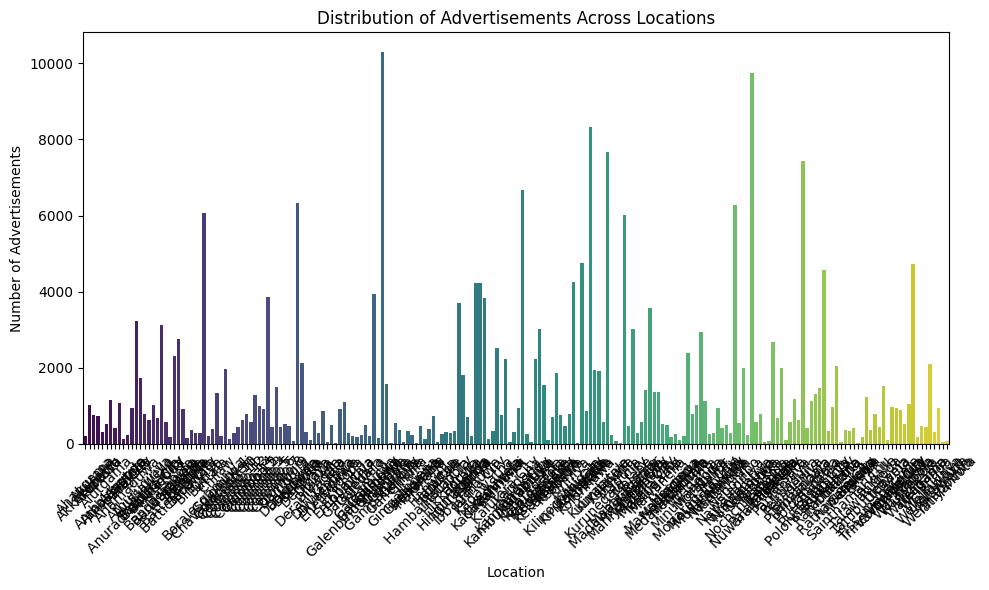

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='ad_count', data=df_counts, palette='viridis')
plt.title('Distribution of Advertisements Across Locations')
plt.xlabel('Location')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-----------

3.	Temporal Analysis:

    ○	Analyze how demand and supply vary over time in different regions.

    ○	Identify any seasonal trends or patterns.

--------


In [184]:
df_new3['posted_date'] = pd.to_datetime(df_new3['posted_date'])
df_new3['posted_month'] = df_new3['posted_date'].dt.to_period('M')

In [185]:
monthly_counts = df_new3.groupby(['location', 'posted_month']).size().reset_index(name='count')

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_20788\2936069593.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


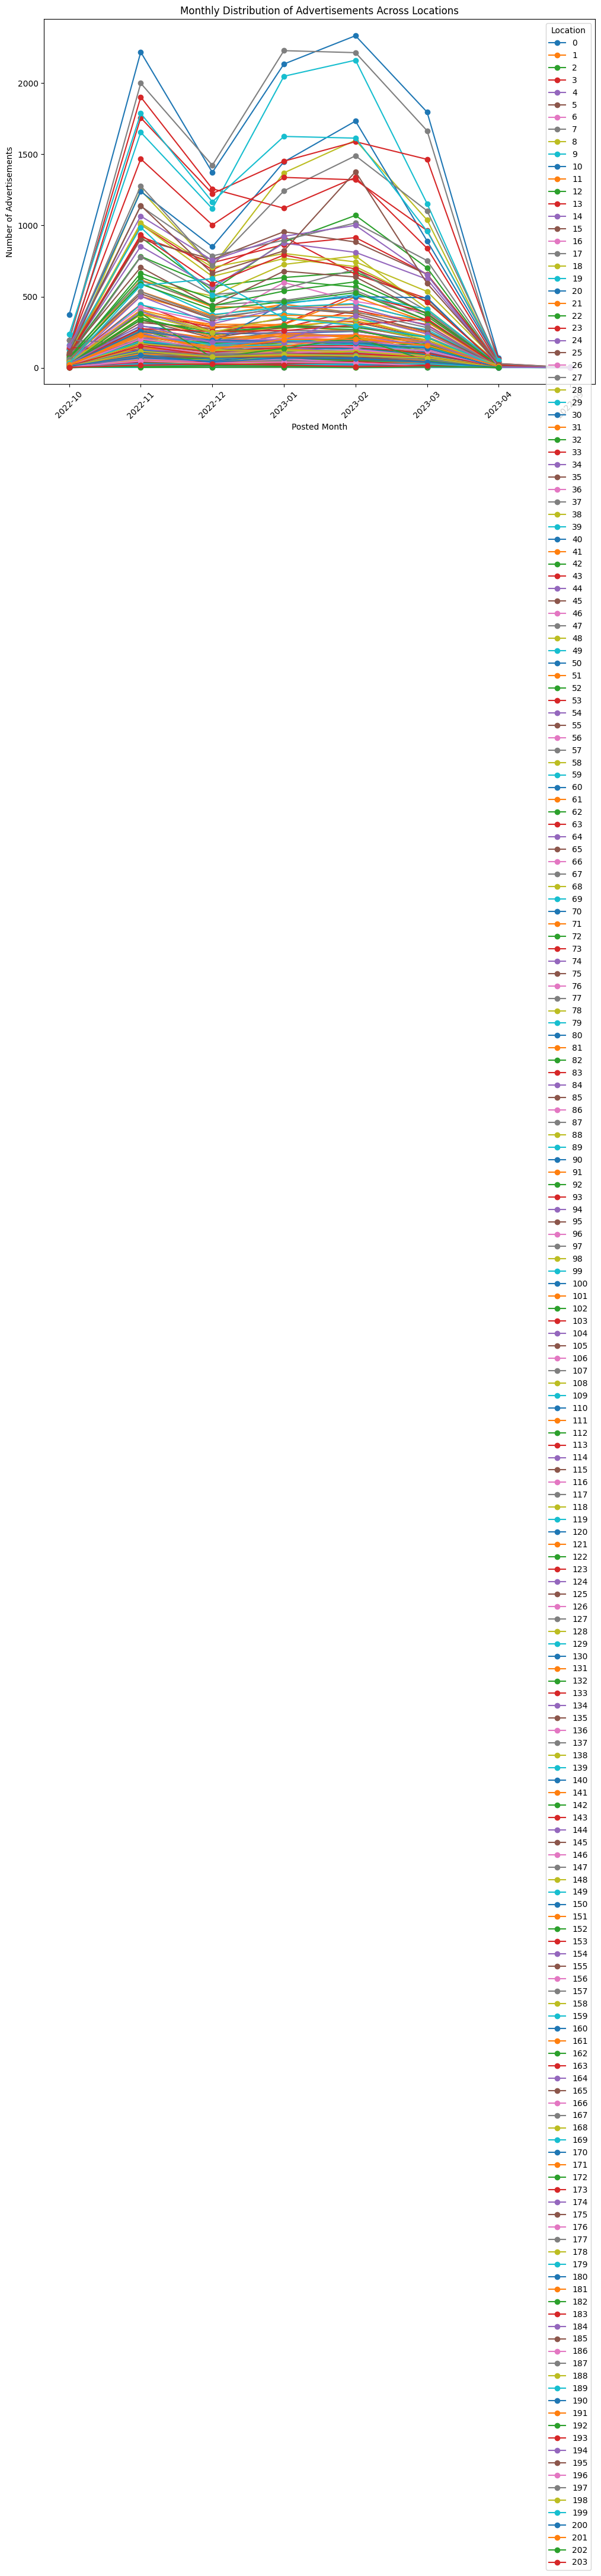

In [187]:
plt.figure(figsize=(12, 8))
for location in monthly_counts['location'].unique():
    location_data = monthly_counts[monthly_counts['location'] == location]
    plt.plot(location_data['posted_month'].astype(str), location_data['count'], marker='o', label=location)

plt.title('Monthly Distribution of Advertisements Across Locations')
plt.xlabel('Posted Month')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

------------

# Summary

----------

Deliverables;

a. Visualizations of geographical and temporal trends in demand and supply.

b. A detailed report on the findings from the geographical analysis.

c. Performance metrics of the demand and supply prediction model.

d. Insights and recommendations based on the analysis.

------------
------------
-----------
-----------